In [130]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [50]:
from geopy.geocoders import GeoNames
import json
geolocator = GeoNames(username='monalisamishra907')

#### Load csv file

In [3]:
data = pd.read_csv('uber-raw-data-apr14.csv')
print("The data has {} rows and {} columns".format(data.shape[0],data.shape[1]))

The data has 564516 rows and 4 columns


In [4]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


#### Convert datetime and extract features

In [5]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [6]:
data.head(2)

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512


In [22]:
# get day of the month
def get_DayOfMonth(dt):
    return dt.day

data['Day'] = data['Date/Time'].map(get_DayOfMonth)

# get the day of the week (Monday=0, Sunday=6)
def get_WeekDay(dt):
    return dt.weekday()

data['DayOfWeek'] = data['Date/Time'].map(get_WeekDay)

# get the hours of the datetime
def get_hour(dt):
    return dt.hour

data['Hour'] = data['Date/Time'].map(get_hour)

In [33]:
'''data.to_csv('data.csv')'''

In [158]:
'''data = pd.read_csv('data.csv')
data = data.drop(data.columns[0], axis=1)'''

In [7]:
data.tail()

,Date/Time,Lat,Lon,Base,Day,DayOfWeek,Hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


### Analyze day of the month

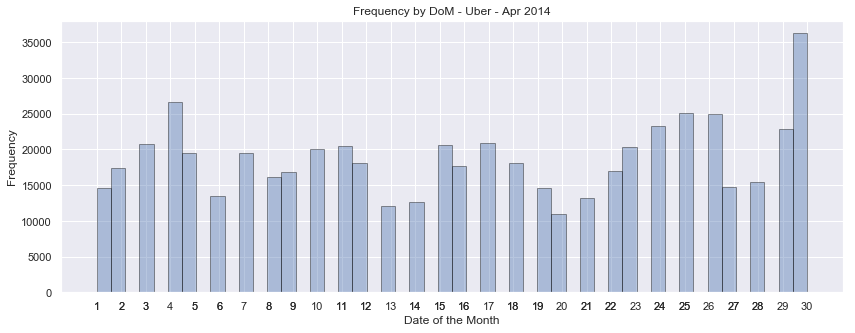

In [151]:
sns.set(color_codes=True)
plt.subplots(figsize = (14,5))
sns.distplot(data.Day, hist=True, kde=False, 
             hist_kws={'edgecolor':'black'})
plt.xticks(np.linspace(1,30).astype(int))
plt.xlabel('Date of the Month')
plt.ylabel('Frequency')
plt.title('Frequency by DoM - Uber - Apr 2014')
plt.show()

### Analyze the Hour

Here, when the hour is 0 it means midnight 12. So, I will replce it with 24 for better visualization

In [161]:
data['Hour'] = data['Hour'].replace(0,24)

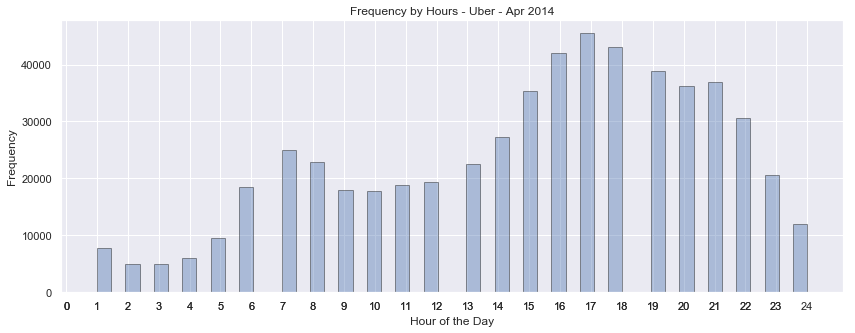

In [163]:
plt.subplots(figsize = (14,5))
sns.distplot(data.Hour, hist=True, kde=False, 
             hist_kws={'edgecolor':'black'})
plt.xticks(np.linspace(0,24).astype(int))
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Frequency by Hours - Uber - Apr 2014')
plt.show()

### Analyze the Weekday

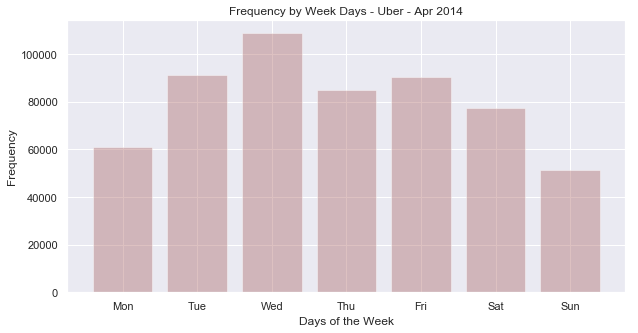

In [170]:
plt.subplots(figsize = (10,5))
plt.hist(data.DayOfWeek, bins=7, range =(-.5,6.5), rwidth=.8, color='#AA6666', alpha=.4)
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.xlabel('Days of the Week')
plt.ylabel('Frequency')
plt.title('Frequency by Week Days - Uber - Apr 2014')
plt.show()

### Analyze Day of the Week and its respective Hour

In [173]:
def count_rows(rows):
    return len(rows)

by_cross = data.groupby('DayOfWeek Hour'.split()).apply(count_rows).unstack()

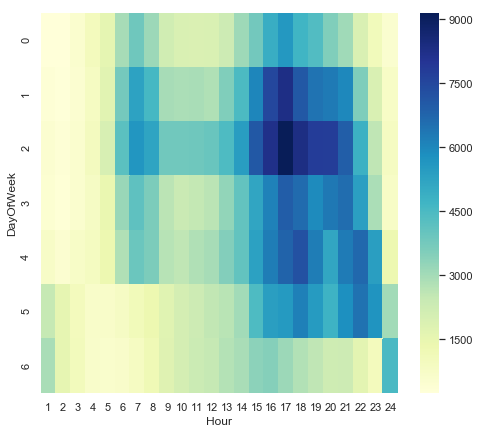

In [178]:
plt.subplots(figsize = (8,7))
sns.heatmap(by_cross,cmap="YlGnBu")
plt.show()

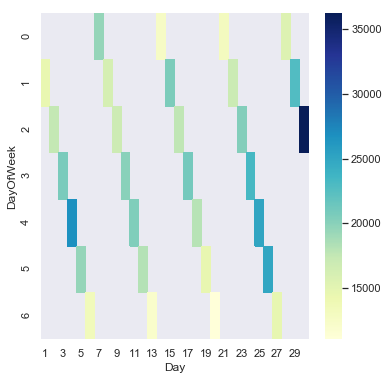

In [187]:
by_cross = data.groupby('DayOfWeek Day'.split()).apply(count_rows).unstack()
plt.subplots(figsize = (6,6))
sns.heatmap(by_cross,cmap="YlGnBu")
plt.show()

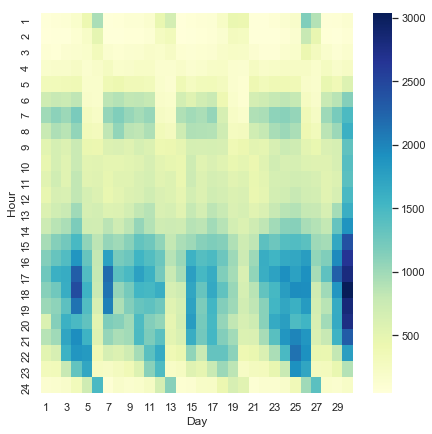

In [189]:
by_cross = data.groupby('Hour Day'.split()).apply(count_rows).unstack()
plt.subplots(figsize = (7,7))
sns.heatmap(by_cross,cmap="YlGnBu")
plt.show()

### Visualize location of high pickups

In [82]:
df = data.groupby(['Lat','Lon']).size().reset_index(name='count')
pickup_data = df[df['count']>80].reset_index(drop=True)
pickup_data['LatLong']=pickup_data['Lat'].astype(str)+','+pickup_data['Lon'].astype(str)

In [83]:
city = []
place = []
for i in pickup_data['LatLong']:
    g = geolocator.reverse(i, exactly_one=False)
    place.append(g[0][0].split(',')[0])
    city.append(g[0][0].split(',')[1])
    
pickup_data['Place'] = place
pickup_data['city'] = city

In [84]:
pickup_data

,Lat,Lon,count,LatLong,Place,city
0,40.6448,-73.7826,85,"40.6448,-73.7826",Springfield Gardens,New York
1,40.6448,-73.7825,171,"40.6448,-73.7825",Springfield Gardens,New York
2,40.6448,-73.7824,99,"40.6448,-73.7824",Springfield Gardens,New York
3,40.6448,-73.7823,86,"40.6448,-73.7823",Springfield Gardens,New York
4,40.6449,-73.7824,201,"40.6449,-73.7824",Springfield Gardens,New York
5,40.6449,-73.7823,374,"40.6449,-73.7823",Springfield Gardens,New York
6,40.6449,-73.7822,418,"40.6449,-73.7822",Springfield Gardens,New York
7,40.6449,-73.7821,380,"40.6449,-73.7821",Springfield Gardens,New York
8,40.6449,-73.7820,139,"40.6449,-73.782",Springfield Gardens,New York
9,40.6449,-73.7819,116,"40.6449,-73.7819",Springfield Gardens,New York


In [86]:
lat = pickup_data['Lat'].values
lon = pickup_data['Lon'].values
count = pickup_data['count']
place = pickup_data['Place']

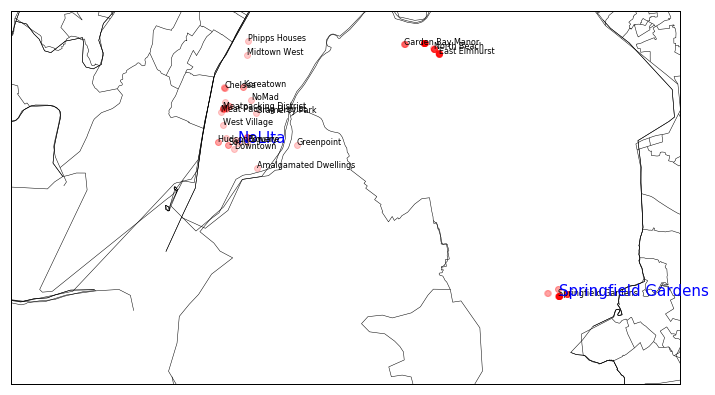

In [125]:
fig = plt.figure(figsize=(12, 12))

m = Basemap(llcrnrlon=-74.15,llcrnrlat=40.6,urcrnrlon=-73.7,urcrnrlat=40.79,
    projection='lcc',resolution=None,width=8E6, height=8E6,lat_1=40.7,lon_0=-74)

# load the shapefile, use the name 'new york'
m.readshapefile('new_york_administrative', name='new york', drawbounds=True)
m.drawmapboundary()
m.shadedrelief()
p =[]

for i in range(pickup_data.shape[0]):
    x, y = m(lon[i], lat[i])
    plt.plot(x, y,marker='o',color='Red',alpha = 0.2)  
    if count[i] == max(count):
        p.append(place[i])
        plt.text(x, y, place[i], fontsize=15, color = 'b')
    elif count[i] == min(count):
        p.append(place[i])
        plt.text(x, y, place[i], fontsize=15, color = 'b')
    else:
        if len(p) == 0:
            p.append(place[i])
            plt.text(x, y, place[i], fontsize=8)
        if place[i] not in p:
            p.append(place[i])
            plt.text(x, y, place[i], fontsize=8)
            
plt.show()

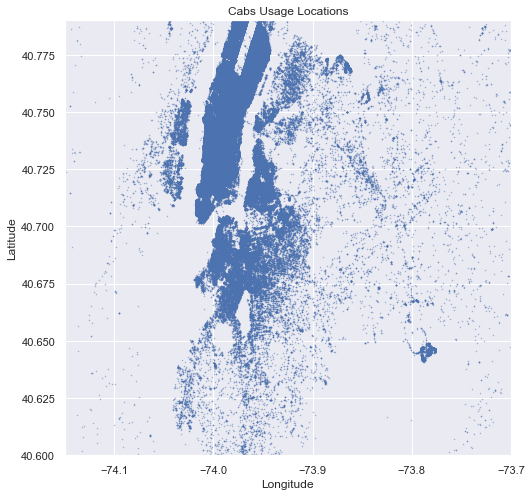

In [191]:
plt.subplots(figsize = (8,8))
plt.plot(data['Lon'], data['Lat'], '.', ms=1, alpha=.5)
plt.xlim(-74.15, -73.7)
plt.ylim(40.6, 40.79)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cabs Usage Locations')
plt.show()

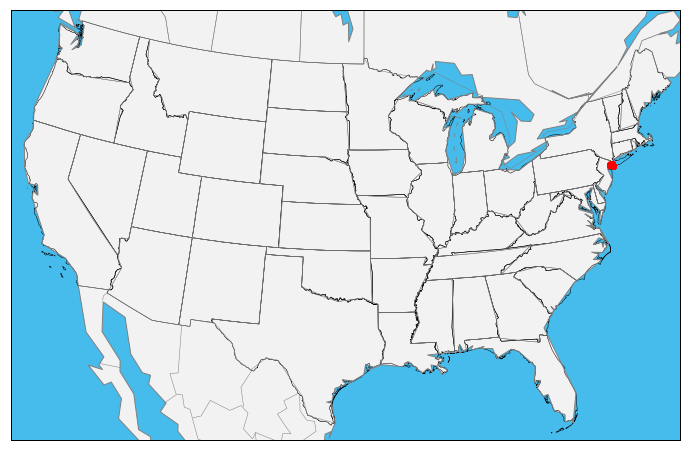

In [18]:
fig = plt.figure(figsize=(12, 12))

m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
m.readshapefile('st99_d00', name='states', drawbounds=True)
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec') #zorder=0
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

for i in range(pickup_data.shape[0]):
    x, y = m(lon[i], lat[i])
    m.plot(x,y,marker='o',color='Red',alpha = 0.3)
plt.show()